# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
X_train.shape

(39209, 32, 32, 3)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [4]:
# the number of training examples
n_train = len(X_train)

# the number of testing examples.
n_test = len(X_test)

# the shape of an traffic sign image?
image_shape = X_train.shape

# the number of classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (39209, 32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

In [6]:
classes=set(y_train)
print(classes)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}


### continnue to show the picturs

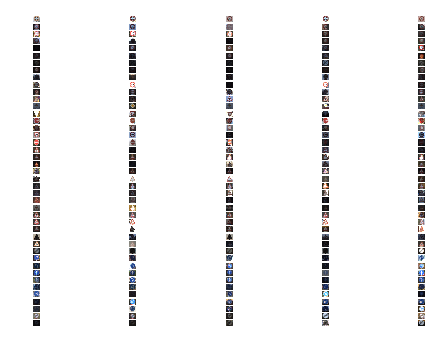

In [7]:
import random

size=5
count=1
for i in range(len(classes)):
    index=(y_train==i)
    subset=X_train[index,]
    for x in range(5):
        img=random.choice(subset)
        plt.subplot(len(classes),size,count)
        plt.axis('off')
        plt.imshow(img)
        count+=1

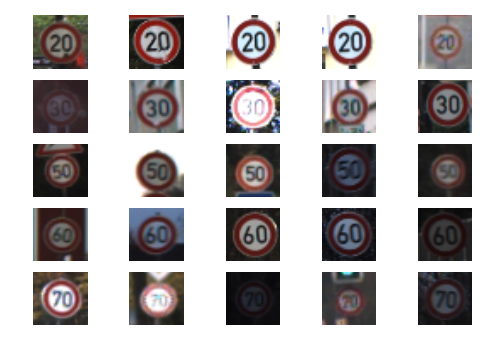

In [34]:
import random
size=5
count=1
for i in range(5):
    index=(y_train==i)
    subset=X_train[index,]
    for x in range(5):
        img=random.choice(subset)
        plt.subplot(5,size,count)
        plt.axis('off')
        plt.imshow(img)
        count+=1
    

## Let's continue 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
learning_rate = 0.001
batch_size = 128
training_epochs = 30


In [9]:
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train)

In [10]:
from tensorflow.contrib.layers import flatten
mean_u=0
sigma=0.1
    
#layer 1 whcih is 32*32*3 as input and 28*28*12 as output
conv1_w=tf.Variable(tf.truncated_normal(shape=(5,5,3,12),mean=mean_u,stddev=sigma))
conv1_b=tf.Variable(tf.zeros(12))

#layer2 which is 14*14*12 as input, and the output is 10*10*16 as output
conv2_w=tf.Variable(tf.truncated_normal(shape=(5,5,12,16),mean=mean_u,stddev=sigma))
conv2_b=tf.Variable(tf.zeros(16))

#layer 3:
fun1_w=tf.Variable(tf.truncated_normal(shape=(400,120),mean=mean_u,stddev=sigma))
fun1_b=tf.Variable(tf.zeros(120))

    
#layer 4
fun2_w=tf.Variable(tf.truncated_normal(shape=(120,84),mean=mean_u,stddev=sigma))
fun2_b=tf.Variable(tf.zeros(84))

#layrer 5
fun3_w=tf.Variable(tf.truncated_normal(shape=(84,43),mean=mean_u,stddev=sigma))
fun3_b=tf.Variable(tf.zeros(43))

def Neuralnets(X):
    #layer 1 whcih is 32*32*3 as input and 28*28*12 as output
    conv1=tf.nn.conv2d(X,conv1_w,strides=[1,1,1,1],padding='VALID')+conv1_b
    
    #apply activation:
    conv1=tf.nn.relu(conv1)
    
    #apply max_pooling: output is 14*14*12
    conv1=tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    #layer2 which is 14*14*12 as input, and the output is 10*10*16 as output
    conv2=tf.nn.conv2d(conv1,conv2_w,strides=[1,1,1,1],padding='VALID')+conv2_b
    conv2=tf.nn.relu(conv2)
    #apply max pooling and we get 5*5*16 output
    conv2=tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    #flatten we get 400
    fun0=flatten(conv2)
    
    #layer 3:
    fun1=tf.matmul(fun0,fun1_w)+fun1_b
    
    #apply actiovation: output 120
    fun1=tf.nn.relu(fun1)
    
    #layer 4
    fun2=tf.matmul(fun1,fun2_w)+fun2_b
    
    #apply actiovation:
    fun2=tf.nn.relu(fun2)
    
    logits=tf.matmul(fun2,fun3_w)+fun3_b
    return logits

In [11]:
#construct functions for the neural nets
x=tf.placeholder(tf.float32,(None,32,32,3))
y=tf.placeholder(tf.int32,(None))
one_hot_y=tf.one_hot(y,43)
logits=Neuralnets(x)
cross_entropy=tf.nn.softmax_cross_entropy_with_logits(logits,one_hot_y)
loss_operation=tf.reduce_mean(cross_entropy)
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation=optimizer.minimize(loss_operation)

In [12]:
cross_prediction=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy_operation=tf.reduce_mean(tf.cast(cross_prediction,tf.float32))

def evaluation(X_data,y_data):
    num_examples=len(X_data)
    total_accuracy=0
    sess=tf.get_default_session()
    for offset in range(0,num_examples,batch_size):
        batch_x,batch_y=X_data[offset:offset+batch_size],y_data[offset:offset+batch_size]
        accuracy=sess.run(accuracy_operation,feed_dict={x:batch_x,y:batch_y})
        total_accuracy+=(accuracy*len(batch_x))
    return total_accuracy/num_examples

In [13]:
X_train.shape

(39209, 32, 32, 3)

## firstly, let's try to run it to see whether the neural network works, and then we can try to use some techniques to improve the result!

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

training_data,validation_data,training_label,validation_label=train_test_split(X_train,y_train,test_size=0.2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples=len(training_data)
    print("we are training our model")
    print()
    for i in range(training_epochs):
        X_train1,y_train1=shuffle(training_data,training_label)
        for offset in range(0,num_examples,batch_size):
            end=offset+batch_size
            batch_x,batch_y=X_train[offset:end],y_train[offset:end]
            sess.run(training_operation,feed_dict={x:batch_x,y:batch_y})
        v_accuracy=evaluation(validation_data,validation_label)
        print("epoch{}:".format(i+1))
        print("the validation accuracy:{:.3f}".format(v_accuracy))
        print()
    cross=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
    accuracy=tf.reduce_mean(tf.cast(cross_prediction,tf.float32))   
    print("the test accuracy after using regularization is:",accuracy.eval({x:X_test,y:y_test}))

   
    

we are training our model

epoch1:
the validation accuracy:0.677

epoch2:
the validation accuracy:0.868

epoch3:
the validation accuracy:0.902

epoch4:
the validation accuracy:0.921

epoch5:
the validation accuracy:0.936

epoch6:
the validation accuracy:0.948

epoch7:
the validation accuracy:0.965

epoch8:
the validation accuracy:0.972

epoch9:
the validation accuracy:0.978

epoch10:
the validation accuracy:0.977

epoch11:
the validation accuracy:0.977

epoch12:
the validation accuracy:0.971

epoch13:
the validation accuracy:0.973

epoch14:
the validation accuracy:0.970

epoch15:
the validation accuracy:0.986

epoch16:
the validation accuracy:0.980

epoch17:
the validation accuracy:0.984

epoch18:
the validation accuracy:0.985

epoch19:
the validation accuracy:0.987

epoch20:
the validation accuracy:0.984

epoch21:
the validation accuracy:0.986

epoch22:
the validation accuracy:0.988

epoch23:
the validation accuracy:0.982

epoch24:
the validation accuracy:0.986

epoch25:
the validatio

### you can see that the validation accuracy is over 98% ,but normally we only get 86%-90% testing accuracy, so we need to improve it! Firstly, I am trying to use regularization to improve it! Before doing that, let's split the X_train data into train set and validation set to test which regularization parameter is the best!

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** The reason why I am trying to use regularization function at this time is that I want to try to solve overfitting problems in this neural network. Since overfitting could highly decrease the testing accuracy. so use regularization can avoid overfitting in some sense. If so, it can be likely to improve the testing accuracy of the neural network!

In [41]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
import numpy as np
from sklearn.model_selection import train_test_split

training_data,validation_data,training_label,validation_label=train_test_split(X_train,y_train,test_size=0.2)

In [42]:
print(len(training_data))
print(len(validation_data))
print(len(X_train))
print(len(training_label))
print(len(validation_label))

31367
7842
39209
31367
7842


In [43]:
#construct functions for the neural nets
x=tf.placeholder(tf.float32,(None,32,32,3))
y=tf.placeholder(tf.int32,(None))
one_hot_y=tf.one_hot(y,43)
logits=Neuralnets(x)
beta=0.001
rf1_w=beta*tf.nn.l2_loss(conv1_w)
rf1_b=beta*tf.nn.l2_loss(conv1_b)
rf2_w=beta*tf.nn.l2_loss(conv2_w)
rf2_b=beta*tf.nn.l2_loss(conv2_b)
rf3_w=beta*tf.nn.l2_loss(fun1_w)
rf3_b=beta*tf.nn.l2_loss(fun1_b)
rf4_w=beta*tf.nn.l2_loss(fun2_w)
rf4_b=beta*tf.nn.l2_loss(fun2_b)
rf5_w=beta*tf.nn.l2_loss(fun3_w)
rf5_b=beta*tf.nn.l2_loss(fun3_b)
cross_entropy=tf.nn.softmax_cross_entropy_with_logits(logits,one_hot_y)
loss_operation=tf.reduce_mean(cross_entropy)+rf1_w+rf1_b+rf2_w+rf2_b+rf3_w+rf3_b+rf4_w+rf4_b+rf5_w+rf5_b
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation=optimizer.minimize(loss_operation)

In [44]:
cross_prediction=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy_operation=tf.reduce_mean(tf.cast(cross_prediction,tf.float32))

def evaluation(X_data,y_data):
    num_examples=len(X_data)
    total_accuracy=0
    sess=tf.get_default_session()
    for offset in range(0,num_examples,batch_size):
        batch_x,batch_y=X_data[offset:offset+batch_size],y_data[offset:offset+batch_size]
        accuracy=sess.run(accuracy_operation,feed_dict={x:batch_x,y:batch_y})
        total_accuracy+=(accuracy*len(batch_x))
    return total_accuracy/num_examples

In [45]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples=len(training_data)
    print("we are training our model")
    print()
    for i in range(training_epochs):
        X_train_new,y_train_new=shuffle(training_data,training_label)
        for offset in range(0,num_examples,batch_size):
            end=offset+batch_size
            batch_x,batch_y=X_train_new[offset:end],y_train_new[offset:end]
            sess.run(training_operation,feed_dict={x:batch_x,y:batch_y})
        validation_accuracy=evaluation(validation_data,validation_label)
        print("epoch{}:".format(i+1))
        print("the validation accuracy:{:.3f}".format(validation_accuracy))
        #print()
    cross=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
    accuracy=tf.reduce_mean(tf.cast(cross_prediction,tf.float32))   
    print("the test accuracy after using regularization is:",accuracy.eval({x:X_test,y:y_test}))
    print()
    

we are training our model

epoch1:
the validation accuracy:0.705
epoch2:
the validation accuracy:0.865
epoch3:
the validation accuracy:0.906
epoch4:
the validation accuracy:0.938
epoch5:
the validation accuracy:0.942
epoch6:
the validation accuracy:0.950
epoch7:
the validation accuracy:0.950
epoch8:
the validation accuracy:0.958
epoch9:
the validation accuracy:0.963
epoch10:
the validation accuracy:0.954
epoch11:
the validation accuracy:0.969
epoch12:
the validation accuracy:0.972
epoch13:
the validation accuracy:0.965
epoch14:
the validation accuracy:0.966
epoch15:
the validation accuracy:0.968
epoch16:
the validation accuracy:0.971
epoch17:
the validation accuracy:0.970
epoch18:
the validation accuracy:0.974
epoch19:
the validation accuracy:0.977
epoch20:
the validation accuracy:0.970
epoch21:
the validation accuracy:0.971
epoch22:
the validation accuracy:0.978
epoch23:
the validation accuracy:0.968
epoch24:
the validation accuracy:0.972
epoch25:
the validation accuracy:0.978
epoch26

### after adding regularization function(beta is 0.001 is appropriate in this case), we get aboout 97% validation accuracy at the end, and we usually have testing accuracy 89%-91% roghly! In some sense, it didn't improve a lot! Thus, we need to think about another way to improve our testing accuracy

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** Firstly, I extracted data from traing file and testing file, and save those data into X_train and X_test. Then, I split the train data into two parts:splitting the train data into 80% and 20%, and view 80% as train data and 20% as validation data 

### now we need to reconstuct our neural nets so that we can improve our testing accuracy, one is that using dropout and add more layers in this neural nets

In [15]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

dropout=0.80
# Hyperparameters
'''
mu = 0
sigma = 0.1
newconv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
newconv1_b = tf.Variable(tf.zeros(6))

newconv2_W=tf.Variable(tf.truncated_normal(shape=(3,3,6,12),mean=mu,stddev=sigma))
newconv2_b=tf.Variable(tf.zeros(12))

newconv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
newconv3_b = tf.Variable(tf.zeros(16))

newfc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
newfc1_b = tf.Variable(tf.zeros(120))

newfc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
newfc2_b  = tf.Variable(tf.zeros(84))

newfc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
newfc3_b  = tf.Variable(tf.zeros(43))
'''

from tensorflow.contrib.layers import flatten
def LeNet(x):    
    mu = 0
    sigma = 0.1
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    newconv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    newconv1_b = tf.Variable(tf.zeros(6))
    newconv1   = tf.nn.conv2d(x, newconv1_W, strides=[1, 1, 1, 1], padding='VALID') + newconv1_b

    # SOLUTION: Activation.
    newconv1 = tf.nn.relu(newconv1)
    
    newconv2_W=tf.Variable(tf.truncated_normal(shape=(3,3,6,12),mean=mu,stddev=sigma))
    newconv2_b=tf.Variable(tf.zeros(12))
    newconv2=tf.nn.conv2d(newconv1,newconv2_W,strides=[1,1,1,1],padding='SAME')+newconv2_b    
    # SOLUTION: Pooling. Input = 28x28x12. Output = 14x14x12.
    newconv2 = tf.nn.max_pool(newconv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    newconv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 16), mean = mu, stddev = sigma))
    newconv3_b = tf.Variable(tf.zeros(16))
    newconv3   = tf.nn.conv2d(newconv2, newconv3_W, strides=[1, 1, 1, 1], padding='VALID') + newconv3_b
    
    # SOLUTION: Activation.
    newconv3 = tf.nn.relu(newconv3)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    newconv3 = tf.nn.max_pool(newconv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    newfc0   = flatten(newconv3)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    newfc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    newfc1_b = tf.Variable(tf.zeros(120))
    newfc1   = tf.matmul(newfc0, newfc1_W) + newfc1_b
    
    # SOLUTION: Activation.
    newfc1    = tf.nn.relu(newfc1)
    #add dropout
    newfc1=tf.nn.dropout(newfc1,dropout)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    newfc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    newfc2_b  = tf.Variable(tf.zeros(84))
    newfc2    = tf.matmul(newfc1, newfc2_W) + newfc2_b
    
    # SOLUTION: Activation.
    newfc2    = tf.nn.relu(newfc2)
    #add dropout 
    newfc2 = tf.nn.dropout(newfc2, dropout)
    
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    newfc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    newfc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(newfc2, newfc3_W) + newfc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** Firstly,we have 32\*32\*3 imput, then using cnn to transform into 28\*28\*6 output. After that, using cnn again to transform it into 28\*28\*12 output, then change it into 14\*14\*12. At the next layer(layer 3), I transform it into 10\*10\*16 output, and using max_pool functions to make it become 5\*5\*16 output. Finally, flatten data and simulate multilayer neural network to transform the cnn neural network become a lyer haveing 120 output nodes. At the next layer, suing dropout technique to ignore 20% nodes, and make it becomne a layer having 80 nodes. Again, using dropout to ignore 20% nodes of current layer, and transform it become a final output layer having 43 nodes!

In [16]:
### Train your model here.
### Feel free to use as many code cells as needed.

#construct functions for the neural nets
x=tf.placeholder(tf.float32,(None,32,32,3))
y=tf.placeholder(tf.int32,(None))
one_hot_y=tf.one_hot(y,43)
logits=LeNet(x)
cross_entropy=tf.nn.softmax_cross_entropy_with_logits(logits,one_hot_y)
loss_operation=tf.reduce_mean(cross_entropy)
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation=optimizer.minimize(loss_operation)

cross_prediction=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy_operation=tf.reduce_mean(tf.cast(cross_prediction,tf.float32))

def evaluation(X_data,y_data):
    num_examples=len(X_data)
    total_accuracy=0
    sess=tf.get_default_session()
    for offset in range(0,num_examples,batch_size):
        batch_x,batch_y=X_data[offset:offset+batch_size],y_data[offset:offset+batch_size]
        accuracy=sess.run(accuracy_operation,feed_dict={x:batch_x,y:batch_y})
        total_accuracy+=(accuracy*len(batch_x))
    return total_accuracy/num_examples


In [17]:
training_times=30
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples=len(training_data)
    print("we are training our model")
    print()
    for i in range(training_times):
        X_train_new,y_train_new=shuffle(training_data,training_label)
        for offset in range(0,num_examples,batch_size):
            end=offset+batch_size
            batch_x,batch_y=X_train_new[offset:end],y_train_new[offset:end]
            sess.run(training_operation,feed_dict={x:batch_x,y:batch_y})
        validation_accuracy=evaluation(validation_data,validation_label)
        print("epoch{}:".format(i+1))
        print("the validation accuracy:{:.3f}".format(validation_accuracy))
        #print()
    cross=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
    accuracy=tf.reduce_mean(tf.cast(cross_prediction,tf.float32))   
    print("the test accuracy after using regularization is:",accuracy.eval({x:X_test,y:y_test}))
    print()

we are training our model

epoch1:
the validation accuracy:0.510
epoch2:
the validation accuracy:0.748
epoch3:
the validation accuracy:0.834
epoch4:
the validation accuracy:0.852
epoch5:
the validation accuracy:0.897
epoch6:
the validation accuracy:0.917
epoch7:
the validation accuracy:0.935
epoch8:
the validation accuracy:0.941
epoch9:
the validation accuracy:0.930
epoch10:
the validation accuracy:0.951
epoch11:
the validation accuracy:0.953
epoch12:
the validation accuracy:0.946
epoch13:
the validation accuracy:0.954
epoch14:
the validation accuracy:0.960
epoch15:
the validation accuracy:0.955
epoch16:
the validation accuracy:0.967
epoch17:
the validation accuracy:0.963
epoch18:
the validation accuracy:0.968
epoch19:
the validation accuracy:0.964
epoch20:
the validation accuracy:0.957
epoch21:
the validation accuracy:0.973
epoch22:
the validation accuracy:0.967
epoch23:
the validation accuracy:0.970
epoch24:
the validation accuracy:0.969
epoch25:
the validation accuracy:0.968
epoch26

### you can see that the testing accuracy has improved a little compared to previous two cases after adding dropout in this case! Normally, we can get testing accuracy >=91% even though I only got 89.1% testing accuracy at this time. However, compared to previous cases, the neural network having dropout has more stable testing accuracy!

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** Basically, I use SCG algorithm to train my neural network, and set batch size as 128, and set epochs as 30. Also, using cross entropy cost function as my cost function to minize it so that I can get a high testing accuracy

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I fistly need to think about how to construct the layers of the neural network. After that, if the testing accuracy is not good, we need to add more hidden layers on it. Also, we still need to adjust batch-size so that we can get better result. In order to improve the predicting result, I tried to use L2_loss function to prevent the neural network from overfitting, but it turns out that it didn't improve a lot! And then, I added dropout technique in my neural network and add one more hidden layers, and I found that the testting accuracy can improve, and the testing accuracy becomes more stable! 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

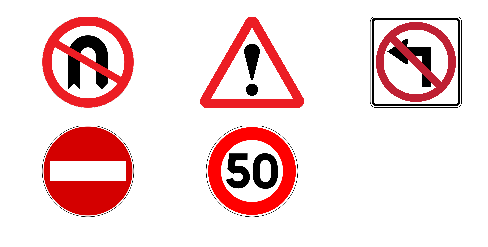

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

image1=mpimg.imread('sign1.png')
plt.subplot(3,3,1)
plt.axis('off')
plt.imshow(image1)

image2=mpimg.imread('sign2.png')
plt.subplot(3,3,2)
plt.axis('off')
plt.imshow(image2)

image3=mpimg.imread('sign3.png')
plt.subplot(3,3,3)
plt.axis('off')
plt.imshow(image3)

image4=mpimg.imread('sign6.png')
plt.subplot(3,3,4)
plt.axis('off')
plt.imshow(image4)

image5=mpimg.imread('sign5.png')
plt.subplot(3,3,5)
plt.axis('off')
plt.imshow(image5)


In [19]:
print(image1.shape)
print(image2.shape)
print(image3.shape)
print(image4.shape)
print(image5.shape)

(600, 600, 4)
(1767, 2000, 4)
(2000, 2000, 4)
(600, 600, 4)
(640, 640, 4)


In [20]:
resized_image1 = cv2.resize(image1, (32, 32))
resized_image2= cv2.resize(image2 ,(32, 32))
resized_image3= cv2.resize(image3,(32, 32))
resized_image4=cv2.resize(image4,(32, 32))
resized_image5=cv2.resize(image5,(32, 32))

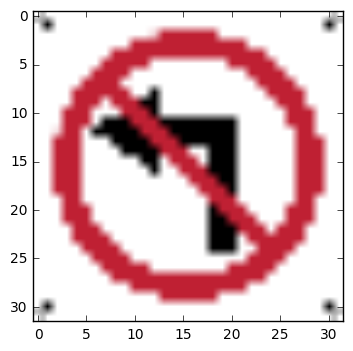

In [21]:
plt.imshow(resized_image3)

In [22]:
resized_image1[:,:,0:3].shape

(32, 32, 3)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** One thing we need to think about is the dimension of the slected images, they are 32\*32\*4, so I need to adjust my images' dimension so that it can fit with my neural network! However, I don't think it is a problem!

In [23]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
selected_images=[]
selected_images.append(resized_image1[:,:,0:3])
selected_images.append(resized_image2[:,:,0:3]) 
selected_images.append(resized_image3[:,:,0:3])
selected_images.append(resized_image4[:,:,0:3]) 
selected_images.append(resized_image5[:,:,0:3])
selected_images=np.array(selected_images)
selected_images.shape

(5, 32, 32, 3)

In [24]:
dic=['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)','Speed limit (70km/h)',\
     'Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)','Speed limit (120km/h)','No passing',\
     'No passing for vehicles over 3.5 metric tons','Right-of-way at the next intersection','Priority road',\
     'Yield','Stop','No vehicles','Vehicles over 3.5 metric tons prohibited','No entry','General caution',\
     'Dangerous curve to the left','Dangerous curve to the right','Double curve','Bumpy road','Slippery road',\
     'Road narrows on the right','Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing'\
     'Beware of ice/snow','Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',\
     'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',\
     'End of no passing','End of no passing by vehicles over 3.5 metric tons']


In [30]:
dic[6]

'End of speed limit (80km/h)'

In [32]:
training_times=30
predict=tf.argmax(logits,1)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples=len(training_data)
    print("we are training our model")
    print()
    for i in range(training_times):
        X_train_new,y_train_new=shuffle(training_data,training_label)
        for offset in range(0,num_examples,batch_size):
            end=offset+batch_size
            batch_x,batch_y=X_train_new[offset:end],y_train_new[offset:end]
            sess.run(training_operation,feed_dict={x:batch_x,y:batch_y})
        validation_accuracy=evaluation(validation_data,validation_label)
        print("epoch{}:".format(i+1))
        print("the validation accuracy:{:.3f}".format(validation_accuracy))
        #print()
    cross=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
    accuracy=tf.reduce_mean(tf.cast(cross_prediction,tf.float32))   
    print("the test accuracy after using regularization is:",accuracy.eval({x:X_test,y:y_test}))
    print()
    res=predict.eval({x:selected_images})
    for i in range(5):
        print("the neural network predicts picture {} as label {}".format(i+1,res[i]))
        print("more specifically, the predicted meaning is ",dic[res[i]])
        #print("and the the predicted label is", predict.eval({x:selected_images[i]}))

we are training our model

epoch1:
the validation accuracy:0.503
epoch2:
the validation accuracy:0.698
epoch3:
the validation accuracy:0.779
epoch4:
the validation accuracy:0.830
epoch5:
the validation accuracy:0.865
epoch6:
the validation accuracy:0.882
epoch7:
the validation accuracy:0.905
epoch8:
the validation accuracy:0.910
epoch9:
the validation accuracy:0.926
epoch10:
the validation accuracy:0.930
epoch11:
the validation accuracy:0.941
epoch12:
the validation accuracy:0.943
epoch13:
the validation accuracy:0.944
epoch14:
the validation accuracy:0.951
epoch15:
the validation accuracy:0.953
epoch16:
the validation accuracy:0.954
epoch17:
the validation accuracy:0.955
epoch18:
the validation accuracy:0.958
epoch19:
the validation accuracy:0.967
epoch20:
the validation accuracy:0.966
epoch21:
the validation accuracy:0.954
epoch22:
the validation accuracy:0.964
epoch23:
the validation accuracy:0.969
epoch24:
the validation accuracy:0.966
epoch25:
the validation accuracy:0.963
epoch26

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** I don't think my neural network predicts sign very well, and the reason is that i didn't use approraite traffic sign pictures to test it! For example, as for the picture1, the 'No tuning left sign' hasn't been trained by my CNN algorithm, so the current neural network won't be able to recognize the 'no tuning left' sign. 

In [40]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
training_times=30
predict=tf.argmax(logits,1)
showprob=tf.nn.top_k(tf.nn.softmax(logits), k=3)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples=len(training_data)
    print("we are training our model")
    print()
    for i in range(training_times):
        X_train_new,y_train_new=shuffle(training_data,training_label)
        for offset in range(0,num_examples,batch_size):
            end=offset+batch_size
            batch_x,batch_y=X_train_new[offset:end],y_train_new[offset:end]
            sess.run(training_operation,feed_dict={x:batch_x,y:batch_y})
        validation_accuracy=evaluation(validation_data,validation_label)
        print("epoch{}:".format(i+1))
        print("the validation accuracy:{:.3f}".format(validation_accuracy))
        #print()
    cross=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
    accuracy=tf.reduce_mean(tf.cast(cross_prediction,tf.float32))   
    print("the test accuracy after using regularization is:",accuracy.eval({x:X_test,y:y_test}))
    print()
    res=predict.eval({x:selected_images})
    #probs=showprob.eval({x:selected_images})
    for i in range(5):
        print("the neural network predicts picture {} as label {}".format(i+1,res[i]))
        print("more specifically, the predicted meaning is ",dic[res[i]])
    prob=sess.run(showprob,feed_dict={x:selected_images})
    print(prob)

we are training our model

epoch1:
the validation accuracy:0.494
epoch2:
the validation accuracy:0.721
epoch3:
the validation accuracy:0.820
epoch4:
the validation accuracy:0.861
epoch5:
the validation accuracy:0.885
epoch6:
the validation accuracy:0.906
epoch7:
the validation accuracy:0.911
epoch8:
the validation accuracy:0.932
epoch9:
the validation accuracy:0.932
epoch10:
the validation accuracy:0.938
epoch11:
the validation accuracy:0.948
epoch12:
the validation accuracy:0.949
epoch13:
the validation accuracy:0.952
epoch14:
the validation accuracy:0.955
epoch15:
the validation accuracy:0.952
epoch16:
the validation accuracy:0.943
epoch17:
the validation accuracy:0.941
epoch18:
the validation accuracy:0.965
epoch19:
the validation accuracy:0.962
epoch20:
the validation accuracy:0.950
epoch21:
the validation accuracy:0.969
epoch22:
the validation accuracy:0.968
epoch23:
the validation accuracy:0.963
epoch24:
the validation accuracy:0.965
epoch25:
the validation accuracy:0.972
epoch26

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** Yes, the predicted result is actually in the top-3 options after checking. However, since the images I selected from the web contains some traffic sign which has different meaning from the train data in the file, so the predicted result may not be that satisfying

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.